# Feature Extraction
## Pandas

In [2]:
import pandas as pd

In [3]:
df_large = pd.read_csv("./../assets/data_large.csv", index_col = 0)

In [4]:
df_large.sample(5)

,city,searched_zipcode,url,content,posting_date,education,n_photos,availability
7204,NewYork,10025,https://delaware.craigslist.org/res/d/it-profe...,Hi. I am IT professional. I am expert in fixin...,2019-08-03 13:53,masters,0,"['afternoons', 'evenings', 'mornings', 'overni..."
23107,Chicago,60617,https://rockford.craigslist.org/res/d/bookkeep...,You don't have to panic this year. Don't wait ...,2019-07-27 10:38,some college,1,"['afternoons', 'evenings', 'mornings', 'weekda..."
8553,NewYork,10025,https://newyork.craigslist.org/mnh/res/d/biz-d...,I specialize in growing startups BtoB only\nCo...,2019-08-08 17:37,associates,1,['weekdays']
30511,Chicago,60625,https://bn.craigslist.org/res/d/painter-genera...,"Im in need of a job, will do manual labor or i...",2019-08-02 15:42,high school/GED,0,"['afternoons', 'mornings']"
20997,SanDiego,92154,https://inlandempire.craigslist.org/res/d/seek...,"Hello Craigslist,\nMy name is Angela I am a 24...",2019-07-27 12:56,some college,0,"['afternoons', 'evenings', 'mornings', 'overni..."


In [5]:
df_large.shape

(33727, 8)

In [6]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33727 entries, 0 to 33726
Data columns (total 8 columns):
city                33727 non-null object
searched_zipcode    33727 non-null int64
url                 33727 non-null object
content             33727 non-null object
posting_date        33727 non-null object
education           33721 non-null object
n_photos            33727 non-null int64
availability        33727 non-null object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


### .fillna()
`.fillna(object)` can be used to fill any empty item in the dataframe

In [6]:
df_large.fillna("-", inplace = True)

### .loc([*condition*])
`.loc([condition])` can be used to filter the dataframe

In [7]:
new_york_df = df_large.loc[df_large['city'] == 'NewYork']
new_york_df.head(10)

,city,searched_zipcode,url,content,posting_date,education,n_photos,availability
6332,NewYork,10025,https://newyork.craigslist.org/mnh/res/d/famil...,"Chauffeur for a family/business, school year. ...",2019-08-08 23:54,bachelors,0,['weekdays']
6333,NewYork,10025,https://boston.craigslist.org/gbs/res/d/lingui...,I am a recent graduated Linguist from Turkey w...,2019-09-05 23:21,bachelors,0,"['afternoons', 'evenings', 'mornings', 'weekda..."
6334,NewYork,10025,https://boston.craigslist.org/gbs/res/d/big-ap...,I am in search of a Houseman position. I enjoy...,2019-08-27 14:45,masters,4,['mornings']
6335,NewYork,10025,https://newyork.craigslist.org/mnh/res/d/mobil...,Need a quick pick me up? Your hair is a mess a...,2019-09-05 22:36,some college,3,"['afternoons', 'evenings', 'mornings', 'weekda..."
6336,NewYork,10025,https://newyork.craigslist.org/mnh/res/d/hire-...,Male 38yrs of age willing and able to meet mos...,2019-09-05 20:45,high school/GED,0,"['overnight', 'weekdays', 'weekends']"
6337,NewYork,10025,https://baltimore.craigslist.org/res/d/cdl-dri...,O points and no accidents ever.millions of mil...,2019-08-25 08:29,high school/GED,0,"['mornings', 'weekdays']"
6338,NewYork,10025,https://newyork.craigslist.org/mnh/res/d/curre...,> You open a forex trading account in your nam...,2019-08-16 15:36,bachelors,0,"['afternoons', 'evenings', 'mornings', 'overni..."
6339,NewYork,10025,https://newyork.craigslist.org/fct/res/d/stamf...,I am intelligent. Well spoken. Can readily pas...,2019-09-05 22:02,masters,0,"['afternoons', 'evenings', 'mornings', 'overni..."
6340,NewYork,10025,https://newyork.craigslist.org/wch/res/d/handy...,My name is Juan\nI have experience in interior...,2019-09-05 22:00,some college,0,"['afternoons', 'mornings', 'weekdays', 'weeken..."
6341,NewYork,10025,https://westernmass.craigslist.org/res/d/house...,Your an elderly person and need help with clea...,2019-09-05 21:38,high school/GED,1,"['afternoons', 'mornings', 'weekdays']"


### .nunique()
`.nunique()` can be used to count the number of unique items in each column.

In [8]:
# Count number of unique information in each column
new_york_df.nunique()

city                   1
searched_zipcode       3
url                 3026
content             2743
posting_date        2817
education              8
n_photos              25
availability          62
dtype: int64

In [9]:
# Get the shape of the data (row, columns)
new_york_df.shape

(8998, 8)

### .drop_duplicates()
`.drop_duplicates()` drops duplicate rows in the dataframe. Parameters can be modified to specify which rows to drop such as `subset` to specify which columns to check for duplicates and `keep` to specify which data point of the duplicates will be kept.

In [10]:
no_duplicate_shape = new_york_df.drop_duplicates(subset='content', keep = 'first').shape
print(f"Shape of no duplicates in content column {no_duplicate_shape}")
new_york_df.drop_duplicates(subset='content', keep = 'first').head()

# It is important to note that .drop_duplicates() doesn't change the original data unless
# the parameter 'inplace' is set to 'True'

Shape of no duplicates in content column (2743, 8)


,city,searched_zipcode,url,content,posting_date,education,n_photos,availability
6332,NewYork,10025,https://newyork.craigslist.org/mnh/res/d/famil...,"Chauffeur for a family/business, school year. ...",2019-08-08 23:54,bachelors,0,['weekdays']
6333,NewYork,10025,https://boston.craigslist.org/gbs/res/d/lingui...,I am a recent graduated Linguist from Turkey w...,2019-09-05 23:21,bachelors,0,"['afternoons', 'evenings', 'mornings', 'weekda..."
6334,NewYork,10025,https://boston.craigslist.org/gbs/res/d/big-ap...,I am in search of a Houseman position. I enjoy...,2019-08-27 14:45,masters,4,['mornings']
6335,NewYork,10025,https://newyork.craigslist.org/mnh/res/d/mobil...,Need a quick pick me up? Your hair is a mess a...,2019-09-05 22:36,some college,3,"['afternoons', 'evenings', 'mornings', 'weekda..."
6336,NewYork,10025,https://newyork.craigslist.org/mnh/res/d/hire-...,Male 38yrs of age willing and able to meet mos...,2019-09-05 20:45,high school/GED,0,"['overnight', 'weekdays', 'weekends']"


### .unique()
`.unique()` returns a list of unique items in a Pandas Series.

In [11]:
# Get the unique values in searched_zipcode
new_york_df['searched_zipcode'].unique()

array([10025, 10002, 10029])

### .groupby()
`.groupby()` groups the dataframe based on a certain feature. It needs to be paired with another function such as `.sum()` or `.count()`. The parameter `by` takes in a string or list. If it's a list, the order of features matters.

In [12]:
# .groupby() alone doesn't help
df_large.groupby(by = ['city'])

In [13]:
# Group by city and then searched_zipcode
df_large.groupby(by = ['city', 'searched_zipcode']).count()

url  content  posting_date  education  \
city        searched_zipcode                                           
Albuquerque 87121              120      120           120        120   
Atlanta     30349              850      850           850        850   
Bakersfield 93307             2036     2036          2036       2036   
Brownsville 78521              116      116           116        116   
Charlotte   28269             1059     1059          1059       1059   
Chicago     60617              820      820           820        820   
            60618              811      811           811        811   
            60625              812      812           812        812   
            60629              818      818           818        818   
            60647              811      811           811        811   
Dallas      75211              994      994           994        994   
            75217              976      976           976        976   
ElPaso      79912               66       66            66         66   
            79936               66       66            66         66   
Fresno      93722             1381     1381          1381       1381   
Houston     77036             1004     1004          1004       1004   
            77083             1004     1004          1004       1004   
            77084             1008     1008          1008       1008   
Lancaster   93535                7        7             7          7   
LasVegas    89110              439      439           439        439   
LosAngeles  90011             2163     2163          2163       2163   
            90044             2161     2161          2161       2161   
Nashville   37211              552      552           552        552   
NewYork     10002             2999     2999          2999       2999   
            10025             2999     2999          2999       2999   
            10029             3000     3000          3000       3000   
Sacramento  95823             1216     1216          1216       1216   
SanDiego    92154             2025     2025          2025       2025   
Yuma        85364             1414     1414          1414       1414   

                              n_photos  availability  
city        searched_zipcode                          
Albuquerque 87121                  120           120  
Atlanta     30349                  850           850  
Bakersfield 93307                 2036          2036  
Brownsville 78521                  116           116  
Charlotte   28269                 1059          1059  
Chicago     60617                  820           820  
            60618                  811           811  
            60625                  812           812  
            60629                  818           818  
            60647                  811           811  
Dallas      75211                  994           994  
            75217                  976           976  
ElPaso      79912                   66            66  
            79936                   66            66  
Fresno      93722                 1381          1381  
Houston     77036                 1004          1004  
            77083                 1004          1004  
            77084                 1008          1008  
Lancaster   93535                    7             7  
LasVegas    89110                  439           439  
LosAngeles  90011                 2163          2163  
            90044                 2161          2161  
Nashville   37211                  552           552  
NewYork     10002                 2999          2999  
            10025                 2999          2999  
            10029                 3000          3000  
Sacramento  95823                 1216          1216  
SanDiego    92154                 2025          2025  
Yuma        85364                 1414          1414

In [14]:
# Group by searched_zipcode then city
df_large.groupby(by = ['searched_zipcode', 'city']).count()

,,url,content,posting_date,education,n_photos,availability
searched_zipcode,city,,,,,,
10002,NewYork,2999,2999,2999,2999,2999,2999
10025,NewYork,2999,2999,2999,2999,2999,2999
10029,NewYork,3000,3000,3000,3000,3000,3000
28269,Charlotte,1059,1059,1059,1059,1059,1059
30349,Atlanta,850,850,850,850,850,850
37211,Nashville,552,552,552,552,552,552
60617,Chicago,820,820,820,820,820,820
60618,Chicago,811,811,811,811,811,811
60625,Chicago,812,812,812,812,812,812


This example doesn't make sense because we know that each zip code only pertains to one city. However, it is important if you want to show certain relationships of features that don't depend on each other. If you have a dataset of vehicle registration, you can present the data grouped by `city` then `car model` to see what models are popular in certain cities or grouped by `car model` then `city` to see what city has a higher count of certain car model.

# Handling Text Data
## Python String

In [15]:
import string
import re
import nltk

# Download nltk model if it doesn't exist
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/princemallari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Now we take a look at how we can clean and work with text data. We'll start with the urls first to get a better understanding of how we can use python to handle text.

In [16]:
# Get 'random' url
sample_url = df_large['url'][42]
sample_url

'https://lascruces.craigslist.org/res/d/in-need-of-employment/6943802725.html'

### .split()
`.split()` splits the string based on the character inside the function. If left blank, it will split it based on white space.

In [17]:
# Split by white space
random_text = "My    \t\t\t\tname is    \n   Prince"
random_text.split()

['My', 'name', 'is', 'Prince']

In [18]:
# Split string based on the '/' character
url_split = sample_url.split('/')
url_split

['https:',
 '',
 'lascruces.craigslist.org',
 'res',
 'd',
 'in-need-of-employment',
 '6943802725.html']

The text of interest here is on the 3rd and 2nd to the last elements of the array.

In [19]:
domain_website = url_split[2]
type_of_employ = url_split[-2]

print(f"The website is '{domain_website}' and the type of employment is '{type_of_employ}'")

The website is 'lascruces.craigslist.org' and the type of employment is 'in-need-of-employment'


Now we need to parse the domain website to focus on the region the website is focused on. We can split the string based on the `/` character.

In [20]:
domain_split = domain_website.split('.')
domain_split

['lascruces', 'craigslist', 'org']

### Re
`re` is short for regex and it's a powerful tool in using regular expressions to extract data. It looks intimidating learning regex but once you get the idea of how to use it, it's not that scary. Usually, just looking up the pattern that you want and adding 'regex' in your google search will lead you to a stackoverflow post.

In [21]:
sample_url

'https://lascruces.craigslist.org/res/d/in-need-of-employment/6943802725.html'

In [22]:
re.findall("//(.*?).craigslist", sample_url)

['lascruces']

In [23]:
re.findall("/(.*?)/", sample_url)

['', 'res', 'in-need-of-employment']

Below we've added the common regex functions that you might use and encounter.

In [24]:
random_text = "Hello123world324.<>$%@#T123..23.4.55,!"

In [25]:
# all numbers
re.findall('[0-9]+', random_text)

['123', '324', '123', '23', '4', '55']

In [26]:
# all lowercase letters
re.findall('[a-z]+', random_text)

['ello', 'world']

In [27]:
# all uppercase letters
re.findall('[A-Z]+', random_text)

['H', 'T']

In [28]:
# All letters
re.findall('[a-zA-Z]+', random_text)

['Hello', 'world', 'T']

In [29]:
# All alphanumeric characters
re.findall('[a-zA-Z0-9]+', random_text)

['Hello123world324', 'T123', '23', '4', '55']

In [30]:
# All punctuations
print(f"{string.punctuation}") # a nifty way of listing all punctuations
re.findall(f"[{string.punctuation}]+", random_text)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['.<>$%@#', '..', '.', '.', ',!']

And we can get the first item as our region.

Now it would be inefficient for us to run this one by one for each of our data points. We can use the `.map()` of the pandas dataframe to map a function to our dataset but we have to write out the function first. We'll write a function for getting the region, and we'll write a function that will get the type of employment.

In [31]:
def get_region(url):
    # Split the url based on the '/' character
    url_split = url.split('/')
    # Get the website string from the array
    domain_website = url_split[2]
    # Split the website string based on the '.' character
    domain_split = domain_website.split('.')
    # Get the region
    region = domain_split[0]
    # Return region
    return region

def get_type_employment(url):
    # Split the url based on the '/' character
    url_split = url.split('/')
    # Get the employment type
    employment_type = url_split[-2]
    # Return employment type
    return employment_type

In [32]:
# Test our function
print(sample_url)
print(f"Region: \t\t{get_region(sample_url)}")
print(f"Employment type: \t{get_type_employment(sample_url)}")

https://lascruces.craigslist.org/res/d/in-need-of-employment/6943802725.html
Region: 		lascruces
Employment type: 	in-need-of-employment


In [33]:
# Create a copy of the dataframe
df_large_copy = df_large

We can now create two new features for a dataset based on the data we extracted from the url.

In [34]:
# Map our function and assign the output to a new column
df_large_copy['region'] = df_large_copy['url'].map(get_region)
df_large_copy['type of employment'] = df_large_copy['url'].map(get_type_employment)
df_large_copy.head()

,city,searched_zipcode,url,content,posting_date,education,n_photos,availability,region,type of employment
0,ElPaso,79936,https://elpaso.craigslist.org/res/d/outbound-r...,"ASIDE FROM WORD OF MOUTH OR FACE TO FACE , COL...",2019-08-27 11:31,some college,0,['weekdays'],elpaso,outbound-retention-specialist
1,ElPaso,79936,https://elpaso.craigslist.org/res/d/best-resum...,Looking for a new job and no respond from the ...,2019-08-07 22:59,bachelors,0,['weekends'],elpaso,best-resume-in-town-from-utep-technical
2,ElPaso,79936,https://elpaso.craigslist.org/res/d/looking-fo...,I DO BEST RESUMES IN TOWN.\n\nI AM TECHNICAL W...,2019-08-17 08:25,bachelors,0,"['afternoons', 'evenings', 'mornings', 'weekda...",elpaso,looking-for-new-career-move-you-need
3,ElPaso,79936,https://elpaso.craigslist.org/res/d/job-needed...,Well I'm a 24 year old female just lost my job...,2019-09-04 13:20,some college,1,"['evenings', 'mornings', 'overnight', 'weekday...",elpaso,job-needed
4,ElPaso,79936,https://lascruces.craigslist.org/res/d/caregiv...,Caregiver available immediately. 5 years hospi...,2019-09-03 09:47,bachelors,0,"['afternoons', 'evenings', 'mornings', 'overni...",lascruces,caregiver


Let's try to take a look at the the content and see if we can extract unique informations from it.

In [35]:
# Get 'random' content
sample_content = df_large['content'][2]
sample_content

'I DO BEST RESUMES IN TOWN.\n\nI AM TECHNICAL WRITER FROM UTEP\n\nIF YOU WANT A NEW JOB OR CAREER CHANGE AND NOT GOING ANYWHERE, ITS NOT YOU, ITS YOUR RESUME\n\nLET ME HELP YOU GET YOU NEW CAREER OPPORTUNITY\n\nMY RESUMES ARE NOT GENERIC, ALL PROFESSIONAL AND TECHNICAL WRITING ONE\n\nSEND ME AN EMAIL YO GET YOU ON YOUR WAY'

We can try to split the content into sentences however, we know that '.' will not always work. There will be words that will have '.' with them such as 'Mr.', 'Ms.', 'Dr.', and more. We also notice some characters that don't make sense such `\n`. For this, we will rely with a popular python library called `nltk` which will help us parse the content into sentences and `re` for text regex.

`re` allows us to use regex expressions to substitute certain characters or phrases in our data. We can remove the `\n` using `re.sub()` function.

In [36]:
# re.sub(old_text, new_text, original_text)
# the "\n+" allows us to replace \n's that repeat multiple times consecutively.
# as you will notice, \n is repeated twice everytime it shows up but that doesn't necessarily happen
# to other data points

# remove next lines
clean = re.sub("\n+", ". ", sample_content)
# remove tabs
clean = re.sub("\t+", ". ", clean)
clean

'I DO BEST RESUMES IN TOWN.. I AM TECHNICAL WRITER FROM UTEP. IF YOU WANT A NEW JOB OR CAREER CHANGE AND NOT GOING ANYWHERE, ITS NOT YOU, ITS YOUR RESUME. LET ME HELP YOU GET YOU NEW CAREER OPPORTUNITY. MY RESUMES ARE NOT GENERIC, ALL PROFESSIONAL AND TECHNICAL WRITING ONE. SEND ME AN EMAIL YO GET YOU ON YOUR WAY'

Alternatively, you can also use the string function `.replace()` but it doesn't give you as much flexibility as a regex function.

In [37]:
sample_content.replace('\n', '. ')

'I DO BEST RESUMES IN TOWN.. . I AM TECHNICAL WRITER FROM UTEP. . IF YOU WANT A NEW JOB OR CAREER CHANGE AND NOT GOING ANYWHERE, ITS NOT YOU, ITS YOUR RESUME. . LET ME HELP YOU GET YOU NEW CAREER OPPORTUNITY. . MY RESUMES ARE NOT GENERIC, ALL PROFESSIONAL AND TECHNICAL WRITING ONE. . SEND ME AN EMAIL YO GET YOU ON YOUR WAY'

With the cleaned text, we can now parse the information to sentences. We use `nltk.sent_tokenize()` for this.

In [38]:
sentences = nltk.sent_tokenize(clean)
sentences

['I DO BEST RESUMES IN TOWN..',
 'I AM TECHNICAL WRITER FROM UTEP.',
 'IF YOU WANT A NEW JOB OR CAREER CHANGE AND NOT GOING ANYWHERE, ITS NOT YOU, ITS YOUR RESUME.',
 'LET ME HELP YOU GET YOU NEW CAREER OPPORTUNITY.',
 'MY RESUMES ARE NOT GENERIC, ALL PROFESSIONAL AND TECHNICAL WRITING ONE.',
 'SEND ME AN EMAIL YO GET YOU ON YOUR WAY']

Notice, how our data is all in caps. We can modify the strings with several string functions such as `.lower()`, `.upper()`, or `.capitalize()`.

In [39]:
sample_sentence = "Mary and I often visit the nearby park."
print(f"Original: \t{sample_sentence}\n")
print(f"Lowercase: \t{sample_sentence.lower()}\n")
print(f"Uppercase: \t{sample_sentence.upper()}\n")
print(f"Capitalize: \t{sample_sentence.capitalize()}")

Original: 	Mary and I often visit the nearby park.

Lowercase: 	mary and i often visit the nearby park.

Uppercase: 	MARY AND I OFTEN VISIT THE NEARBY PARK.

Capitalize: 	Mary and i often visit the nearby park.


In some analysis, text is usually lowercased to have a standard format. When words are being grouped or counted, the program will not be able to distinguish `Hello` from `hello` or `hElLo`.

We can also split the text into words with nltk.

In [40]:
words = nltk.word_tokenize(clean)
words

['I',
 'DO',
 'BEST',
 'RESUMES',
 'IN',
 'TOWN..',
 'I',
 'AM',
 'TECHNICAL',
 'WRITER',
 'FROM',
 'UTEP',
 '.',
 'IF',
 'YOU',
 'WANT',
 'A',
 'NEW',
 'JOB',
 'OR',
 'CAREER',
 'CHANGE',
 'AND',
 'NOT',
 'GOING',
 'ANYWHERE',
 ',',
 'ITS',
 'NOT',
 'YOU',
 ',',
 'ITS',
 'YOUR',
 'RESUME',
 '.',
 'LET',
 'ME',
 'HELP',
 'YOU',
 'GET',
 'YOU',
 'NEW',
 'CAREER',
 'OPPORTUNITY',
 '.',
 'MY',
 'RESUMES',
 'ARE',
 'NOT',
 'GENERIC',
 ',',
 'ALL',
 'PROFESSIONAL',
 'AND',
 'TECHNICAL',
 'WRITING',
 'ONE',
 '.',
 'SEND',
 'ME',
 'AN',
 'EMAIL',
 'YO',
 'GET',
 'YOU',
 'ON',
 'YOUR',
 'WAY']

Let's write a function that will apply regex functions as well as turn the text to lowercase.

In [41]:
def clean_text(text):
    # remove next lines
    clean_text = re.sub("\n+", ". ", text)
    # remove tabs
    clean_text = re.sub("\t+", ". ", clean_text)
    # lowercase text
    clean_text = clean_text.lower()
    
    return clean_text

Then we'll map that function.

In [42]:
df_large_copy['clean_content'] = df_large_copy['content'].map(clean_text)
df_large_copy.head()

,city,searched_zipcode,url,content,posting_date,education,n_photos,availability,region,type of employment,clean_content
0,ElPaso,79936,https://elpaso.craigslist.org/res/d/outbound-r...,"ASIDE FROM WORD OF MOUTH OR FACE TO FACE , COL...",2019-08-27 11:31,some college,0,['weekdays'],elpaso,outbound-retention-specialist,"aside from word of mouth or face to face , col..."
1,ElPaso,79936,https://elpaso.craigslist.org/res/d/best-resum...,Looking for a new job and no respond from the ...,2019-08-07 22:59,bachelors,0,['weekends'],elpaso,best-resume-in-town-from-utep-technical,looking for a new job and no respond from the ...
2,ElPaso,79936,https://elpaso.craigslist.org/res/d/looking-fo...,I DO BEST RESUMES IN TOWN.\n\nI AM TECHNICAL W...,2019-08-17 08:25,bachelors,0,"['afternoons', 'evenings', 'mornings', 'weekda...",elpaso,looking-for-new-career-move-you-need,i do best resumes in town.. i am technical wri...
3,ElPaso,79936,https://elpaso.craigslist.org/res/d/job-needed...,Well I'm a 24 year old female just lost my job...,2019-09-04 13:20,some college,1,"['evenings', 'mornings', 'overnight', 'weekday...",elpaso,job-needed,well i'm a 24 year old female just lost my job...
4,ElPaso,79936,https://lascruces.craigslist.org/res/d/caregiv...,Caregiver available immediately. 5 years hospi...,2019-09-03 09:47,bachelors,0,"['afternoons', 'evenings', 'mornings', 'overni...",lascruces,caregiver,caregiver available immediately. 5 years hospi...


We can save the file to csv format with `.to_csv` function

In [43]:
df_large_copy.to_csv("./../assets/data_large_clean.csv")

# Bonus Stuff:

## Sentiment Analysis with TextBlob
Sentiment analysis whether the text is positive(1.0) or negative(-1.0).

In [44]:
from textblob import TextBlob

In [45]:
positive_text = "The movie was great."
negative_text = "The movie seat was dirty."

In [46]:
TextBlob(positive_text).sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [47]:
TextBlob(negative_text).sentiment

Sentiment(polarity=-0.6, subjectivity=0.8)

In [48]:
def get_sentiment(text):
    polarity, subjectivity = TextBlob(text).sentiment
    print(text)
    print(f"Polarity = {polarity:.2f}")
    print(f"Subjectivity = {subjectivity:.2f}")
    print("___")

In [49]:
get_sentiment("This taco")
get_sentiment("This taco is")
get_sentiment("This taco is disgusting")
get_sentiment("This taco is disgustingly good")

This taco
Polarity = 0.00
Subjectivity = 0.00
___
This taco is
Polarity = 0.00
Subjectivity = 0.00
___
This taco is disgusting
Polarity = -1.00
Subjectivity = 1.00
___
This taco is disgustingly good
Polarity = 0.70
Subjectivity = 0.60
___


Not always correct but is useful.

## Wordcloud

The more a word appears in a document, the bigger and bolder the word appears in the Wordcloud.

In [50]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

sample_idx = 300
text = df_large_copy['clean_content'].iloc[sample_idx]
wordcloud = WordCloud().generate(text)

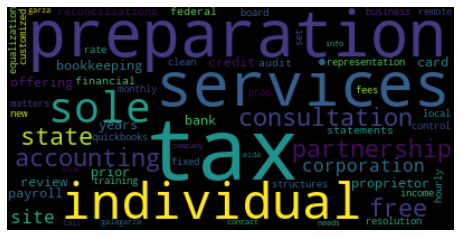

Original Text:
offering tax preparation for individuals, sole proprietor, partnership, and corporations. free consultation and review of prior tax years.. * accounting services. * bookkeeping services. * payroll services. * bank and credit card reconciliations. * financial statements preparations. * federal & state tax audit representation. * tax resolution matters. * income tax preparation (individual, corporation, partnership, sole prop). * state board of equalization. * quickbooks set up, training and/or clean up. * new business structures. off site, control remote or on site if local. monthly fees, or hourly, or fixed rate. customized to each company/individual needs.. call for a free consultation. elda garza. @ galagarza tax and accounting. *** show contact info


In [51]:
plt.figure(figsize = (8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

print(f"Original Text:\n{text}")

In [52]:
# The 'not-so-pretty' version
frequency_df = []

sample_paragraph    = text

# Remove non alphanumeric text
cleaned_paragraph   = re.sub('[^0-9a-zA-Z]+', ' ', sample_paragraph)

# Tokenize the text
tokenized_paragraph = nltk.word_tokenize(cleaned_paragraph)

# Define stopword list
stopwords = set(nltk.corpus.stopwords.words('english'))

# Print the 10 most common words and their frequency
for word, count in Counter(tokenized_paragraph).most_common():
    
    # Check if the word is a stop word or not
    if word not in stopwords:
        frequency_df.append([word, count])
        
        # Stop at 10 words
        if len(frequency_df) == 10:
            break

# Convert to dataframe for better visualization
frequency_df = pd.DataFrame(frequency_df, columns = ['word', 'frequency'])
frequency_df

,word,frequency
0,tax,6
1,services,3
2,preparation,2
3,sole,2
4,partnership,2
5,free,2
6,consultation,2
7,accounting,2
8,state,2
9,individual,2


Notice how wordcloud also removes stop words